# Data Science Aplicada à Área de Saúde

## Modelagem Estatística

A Estatística fornece respostas para muitos padrões importantes nos dados. Modelos estatísticos ajudam a resumir de forma concisa e a inferir sobre os relacionamentos entre as variáveis. A modelagem preditiva geralmente é incompleta sem entender esses relacionamentos.

Veremos agora como ajustar e analisar modelos estatísticos em variáveis-alvo quantitativas (regressão linear) e qualitativas (regressão logística). Usaremos a biblioteca Statsmodels para modelagem estatística. 

## Análise de Regressão Linear

Modelos de regressão linear são modelos que prevêem um rótulo contínuo. O objetivo é produzir um modelo que represente o "melhor ajuste" para alguns dados observados, de acordo com um critério de avaliação que escolhemos. Bons exemplos disso são prever o preço da casa, as vendas de uma loja de varejo ou a expectativa de vida de um indivíduo. Os modelos de regressão linear assumem uma relação linear entre as variáveis independentes (x) e a variável dependente (y).

Para construir modelos de regressão linear, usaremos os dados de expectativa de vida de indivíduos em diversos países do mundo (são os dados que usamos para construir os modelos estatísticos e preditivos ao final do capítulo anterior).

<img src="imagens/linear_regression.png" alt="Drawing" style="width: 400px;"/>

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

In [2]:
# Imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
pd.__version__

'1.0.1'

In [4]:
np.__version__

'1.18.1'

In [5]:
sm.__version__

'0.10.1'

In [6]:
sns.__version__

'0.9.0'

In [7]:
import matplotlib as m
m.__version__

'3.2.0'

In [8]:
import sklearn as sk
sk.__version__

'0.22.2'

In [9]:
# Carrega os dados
dataset = pd.read_csv("dados/expectativa_vida.csv")
print(dataset.shape) 
dataset.head(5)

(2222, 10)


,ID,life_expectancy,bmi,hiv,gdp,thinness_till19,inf_death,school,lifestyle,pop_size
0,0,65.0,19.1,0.1,584.259210,17.2,62,10.1,0.191,3
1,1,59.9,18.6,0.1,612.696514,17.5,64,10.0,0.186,1
2,2,59.9,18.1,0.1,631.744976,17.7,66,9.9,0.181,3
3,3,59.5,17.6,0.1,669.959000,17.9,69,9.8,0.176,2
4,4,59.2,17.2,0.1,63.537231,18.2,71,9.5,0.172,2


Começaremos com um modelo de regressão linear simples com apenas uma variável, 'school', prevendo 'life_expectancy'. As linhas de código abaixo se ajustam ao modelo de regressão linear univariada e imprimem um resumo do resultado.

In [10]:
# Primeira versão do modelo de regressão
formula = 'life_expectancy ~ school'
modelo_v1 = ols(formula, data = dataset).fit()
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     3634.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        00:45:10   Log-Likelihood:                -7155.3
No. Observations:                2222   AIC:                         1.431e+04
Df Residuals:                    2220   BIC:                         1.433e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.1038      0.494     81.191      0.000      39.135      41.072
school         2.3888      0.040     60.284      0.000       2.311       2.467
==============================================================================
Omnibus:                      249.699   Durbin-Watson:                   0.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              360.095
Skew:                          -0.843   Prob(JB):                     6.40e-79
Kurtosis:                       4.022   Cond. No.                         48.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O resumo acima fornece várias medidas para lhe dar uma ideia da distribuição e do comportamento dos dados. A partir daqui, podemos ver se os dados têm as características corretas para nos dar confiança no modelo resultante. 

Os coeficientes são estimados usando o critério dos mínimos quadrados. Em outras palavras, encontramos a linha (matematicamente) que minimiza a soma dos resíduos quadrados (ou "soma dos erros quadrados").

### Interpretação do Coeficiente do Modelo e do Valor-p

A seção central da saída, onde o cabeçalho começa com coef, é importante para a interpretação do modelo. 

O modelo ajustado implica que, ao comparar dois indivíduos onde a escolaridade (school) seja diferente em uma unidade, o indivíduo com escolaridade mais alta terá, em média, uma expectativa de vida mais alta do que 2.3888 unidades. 

Essa diferença é estatisticamente significativa, porque o valor p, mostrado na coluna rotulada P>|t|, é menor que o valor de significância de 0,05. Isso significa que há uma forte evidência de uma associação linear entre as variáveis 'school' e 'life_expectancy'.

Valor-p é a probabilidade de que eventos extremos ocorram sob a hipótese nula. Se o valor-p for menor que um determinado nível de significância α (uma escolha comum é α = 0,05), a hipótese nula será rejeitada, e um coeficiente de regressão é considerado significativo.

### Interpretação do Valor do Coeficiente de Determinação R2 (R Squared)

O outro parâmetro para testar a eficácia do modelo é o valor do R2, que representa a variação percentual na variável dependente (life_expectancy) que é explicada pela variável independente (school). 

Quanto maior o valor, melhor a explicabilidade do modelo, sendo o valor mais alto igual a um. No nosso caso, o valor do R2 de 0.621 significa que 62% da variação na variável 'life_expectancy' é explicada pela variável 'school'.

### Interpretação do Coeficiente de Correlação

O coeficiente de correlação de Pearson também é um indicador da extensão e da força da relação linear entre as duas variáveis. As linhas de código abaixo calculam e imprimem o coeficiente de correlação, que acaba sendo 0,787. Essa é uma forte correlação positiva entre as duas variáveis, com o valor mais alto sendo igual a um.

In [11]:
# Calculando a correlação entre as variáveis
cc = dataset[["life_expectancy", "school"]].corr()
print(cc)

                 life_expectancy    school
life_expectancy         1.000000  0.787895
school                  0.787895  1.000000


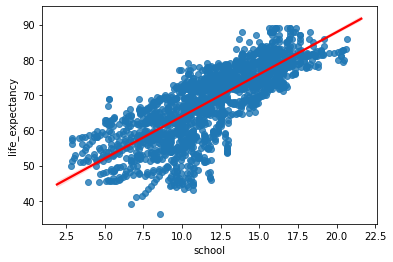

In [12]:
# Criando a linha de regressão
sns.regplot('school', 'life_expectancy', dataset, line_kws = {"color":"r"})

### Intervalo de Confiança

In [13]:
# Vamos gerar uma nova massa de dados de indivíduos com 5, 10 e 15 anos de escolaridade
novos_dados = pd.DataFrame([[1, 5], [1, 10], [1, 15]], columns = ['Intercept', 'school'])

In [14]:
novos_dados

,Intercept,school
0,1,5
1,1,10
2,1,15


In [15]:
# Fazendo previsões (estimativas) com o modelo
modelo_v1.predict(novos_dados)

0    52.047977
1    63.992137
2    75.936298
dtype: float64

Intervalos de Confiança são intervalos em torno dos estimadores individuais β̂k que, se construídos para regressões em várias amostras, conteriam o parâmetro verdadeiro da população, βk, por exemplo, 95% do tempo.

O Statsmodels calcula intervalos de confiança de 95% para os coeficientes do nosso modelo, que são interpretados da seguinte maneira: Se a população da qual essa amostra foi coletada for amostrada 100 vezes, aproximadamente 95 desses intervalos de confiança conteriam o coeficiente "verdadeiro".

O Valor-p representa a probabilidade de que o coeficiente seja realmente zero.

- Se o intervalo de confiança de 95% não incluir zero, o valor-p será menor que 0,05. Rejeitamos a hipótese nula. Existe um relacionamento da variável preditora com a variável alvo.

- Se o intervalo de confiança de 95% incluir zero, o valor-p para esse coeficiente será maior que 0,05. Falha em rejeitar a hipótese nula. Não há relacionamento da variável preditora com a variável alvo.

In [16]:
# Coeficientes
modelo_v1.params

Intercept    40.103817
school        2.388832
dtype: float64

In [17]:
# Intervalo de confiança dos coeficientes
modelo_v1.conf_int()

,0,1
Intercept,39.135171,41.072463
school,2.311123,2.466541


In [18]:
# Criando nossa própria função predict para coletar o intervalo de confiança das estimativas
def my_predict(modelo, novos_dados):
    
    # Obtendo os valores previstos
    fit = pd.DataFrame(modelo_v1.predict(novos_dados), columns = ['Previsão'])
    
    # Obtendo o intervalo de confiança para o modelo (e renomeando as colunas para algo um pouco mais útil)
    ci = modelo_v1.conf_int().rename(columns = {0: 'Limite-Inferior', 1: 'Limite-Superior'})
    
    # Agora, um pouco de multiplicação de matrizes para obter os intervalos de confiança para as previsões
    ci = ci.T.dot(novos_dados.T).T
    
    # E finalmente s intervalos de confiança com os valores previstos
    return pd.concat([fit, ci], axis = 1)

In [19]:
# Fazendo previsões (estimativas) com o modelo usando nossa função personalizada
my_predict(modelo_v1, novos_dados)

,Previsão,Limite-Inferior,Limite-Superior
0,52.047977,50.690786,53.405168
1,63.992137,62.246401,65.737874
2,75.936298,73.802016,78.070579


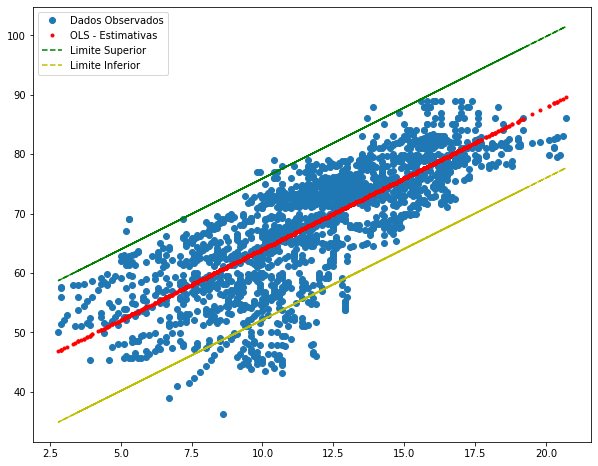

In [20]:
# Plot do Intervalo de Confiança
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Extrai os limites de confiança
_, ic_inferior, ic_superior = wls_prediction_std(modelo_v1)

# Cria o plot
fig, ax = plt.subplots(figsize = (10,8))

# Define x e y
x = dataset.school
y = dataset.life_expectancy

# Adiciona as camadas
ax.plot(x, y, 'o', label = "Dados Observados")
ax.plot(x, modelo_v1.fittedvalues, 'r.', label = "OLS - Estimativas")
ax.plot(x, ic_superior, 'g--', label = "Limite Superior")
ax.plot(x, ic_inferior, 'y--', label = "Limite Inferior")
ax.legend(loc = 'best');

In [21]:
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     3634.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        00:45:11   Log-Likelihood:                -7155.3
No. Observations:                2222   AIC:                         1.431e+04
Df Residuals:                    2220   BIC:                         1.433e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.1038      0.494     81.191      0.000      39.135      41.072
school         2.3888      0.040     60.284      0.000       2.311       2.467
==============================================================================
Omnibus:                      249.699   Durbin-Watson:                   0.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              360.095
Skew:                          -0.843   Prob(JB):                     6.40e-79
Kurtosis:                       4.022   Cond. No.                         48.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Valor t

O teste-t está diretamente relacionado ao cálculo dos intervalos de confiança e está testando se um regressor, β̂k, é estatisticamente significativo. A estatística t para o coeficiente de regressão k-ésimo, sob a hipótese nula de que xk e y são independentes, segue uma distribuição t com graus de liberdade n-K.

Quando você realiza um teste t, geralmente tenta encontrar evidências de uma diferença significativa entre as médias populacionais (2 amostras t) ou entre a média populacional e um valor hipotético (1 amostra t). 

O valor t mede o tamanho da diferença em relação à variação nos dados da amostra. Em outras palavras, o valor t é simplesmente a diferença calculada representada em unidades de erro padrão. Quanto maior a magnitude do valor t, maior a evidência contra a hipótese nula. Isso significa que há uma evidência maior de que há uma diferença significativa. Quanto mais o valor de t estiver próximo de 0, maior a probabilidade de que não haja uma diferença significativa.

Ou seja:

- Valor t maior que +2 ou menor que -2 (e valor-p menor que 0.05) - rejeitamos a hipótese nula. O regressor é importante.

- Valor t menor que +2 ou maior que -2 (e valor-p maior que 0.05) - não rejeitamos a hipótese nula. O regressor não é importante.

O valor t é calculado dividindo o valor estimado do parâmetro (coeficiente) pelo seu erro padrão. Essa estatística é uma medida da probabilidade de que o valor real do parâmetro não seja zero. Quanto maior o valor absoluto de t, menos provável que o valor real do parâmetro possa ser zero.

In [22]:
# Extraindo o valor t do modelo
modelo_v1.tvalues

Intercept    81.190571
school       60.283566
dtype: float64

### Estatística F

Enquanto o teste t considera a significância de um único regressor, o teste F avalia a significância de toda a regressão, onde a hipótese nula é que todos os regressores, exceto a constante, são iguais a zero.

Estatística F - Uma medida de quão significativo é o ajuste. É o erro quadrático médio do modelo dividido pelo erro quadrático médio dos resíduos.

Se o valor-p é menor que 0.05 e temos um grande valor da Estatística F, isso indica que há relação entre os regressores e a variável alvo.

Um teste F é um tipo de teste estatístico muito flexível. Você pode usá-los em uma ampla variedade de configurações. Os testes F podem avaliar vários termos do modelo simultaneamente, o que lhes permite comparar os ajustes de diferentes modelos lineares. Por outro lado, os testes t podem avaliar apenas um termo de cada vez.

- Prob (F-statistic):

As estatísticas "Valor F" e "Prob (F)" testam a significância geral do modelo de regressão. Especificamente, eles testam a hipótese nula de que todos os coeficientes de regressão são iguais a zero. Isso testa o modelo completo em relação a um modelo sem variáveis e com a estimativa da variável dependente sendo a média dos valores da variável dependente. O valor F é a razão da soma dos quadrados da regressão média dividida pela soma dos quadrados dos erros médios. Seu valor varia de zero a um número arbitrariamente grande. 

O valor de Prob (F-statistic) é a probabilidade de que a hipótese nula para o modelo completo seja verdadeira (ou seja, que todos os coeficientes de regressão sejam zero). Por exemplo, se o Prob (F) tiver um valor de 0,01000, haverá 1 chance em 100 de que todos os parâmetros de regressão sejam zero. Esse valor baixo implicaria que pelo menos alguns dos parâmetros de regressão são diferentes de zero e que a equação de regressão tem alguma validade no ajuste dos dados (ou seja, as variáveis independentes não são puramente aleatórias em relação à variável dependente).

In [23]:
# Extraindo a Estatística F do modelo
modelo_v1.fvalue

3634.108277237379

### Resíduos

Se os dados forem bons para modelagem, nossos resíduos terão certas características. Essas características são:

- Os erros são normalmente distribuídos pelos dados. Em outras palavras, se você plotar os erros em um histograma, eles devem assumir a curva tradicional de sino ou a forma gaussiana.

- As variáveis independentes são realmente independentes e não colineares. Queremos garantir a independência entre todas as nossas entradas, caso contrário, nossas entradas afetarão uma à outra, em vez de nossa resposta.

- Existe "homoscedasticidade". Isso significa que a variação dos erros é consistente em todo o conjunto de dados. Queremos evitar situações em que a taxa de erro cresça em uma direção específica. Isto é homoscedástico:

<img src="imagens/homoscedastic.png" alt="Drawing" style="width: 400px;"/>

E isso não é homoscedástico:

<img src="imagens/not-homoscedastic.png" alt="Drawing" style="width: 400px;"/>

Observe que, no primeiro gráfico, a variação entre os pontos alto e baixo em qualquer valor X é aproximadamente o mesmo. No segundo gráfico, à medida que X cresce, o mesmo ocorre com a variação.

(array([ 10.,  41.,  48., 112., 276., 477., 705., 433., 111.,   9.]),
 array([-2.43477725e+01, -2.02894579e+01, -1.62311434e+01, -1.21728288e+01,
        -8.11451421e+00, -4.05619963e+00,  2.11494268e-03,  4.06042952e+00,
         8.11874410e+00,  1.21770587e+01,  1.62353733e+01]),
 <a list of 10 Patch objects>)

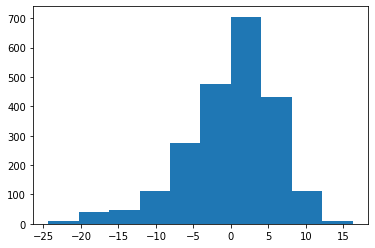

In [24]:
# Plot dos Resíduos
plt.hist(modelo_v1.resid)

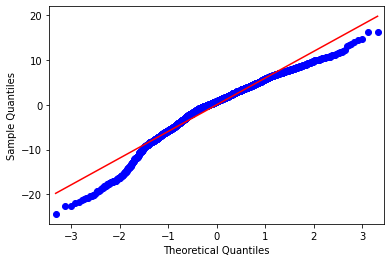

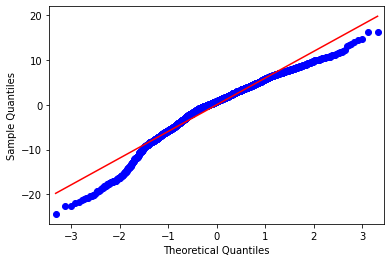

In [25]:
# Plot dos desvios dos resíduos - QQ Plot
from statsmodels import graphics
graphics.gofplots.qqplot(modelo_v1.resid, line = 'r')

### Testes Estatísticos Para Normalidade dos Resíduos

In [26]:
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     3634.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        00:45:11   Log-Likelihood:                -7155.3
No. Observations:                2222   AIC:                         1.431e+04
Df Residuals:                    2220   BIC:                         1.433e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.1038      0.494     81.191      0.000      39.135      41.072
school         2.3888      0.040     60.284      0.000       2.311       2.467
==============================================================================
Omnibus:                      249.699   Durbin-Watson:                   0.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              360.095
Skew:                          -0.843   Prob(JB):                     6.40e-79
Kurtosis:                       4.022   Cond. No.                         48.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Imports
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [28]:
# Lista de estatísticas
nome1 = ['Omnibus (Chi^2)', 'Prob(Omnibus) (Two-tail probability)']

# Teste
teste1 = sms.omni_normtest(modelo_v1.resid)

# Imprime o resultado
lzip(nome1, teste1)

[('Omnibus (Chi^2)', 249.6989622419555),
 ('Prob(Omnibus) (Two-tail probability)', 6.0056397957484185e-55)]

- Omnibus / Prob (Omnibus) - Uma das suposições do OLS é que os erros são normalmente distribuídos. O teste Omnibus é realizado para verificar isso. Aqui, a hipótese nula é que os erros são normalmente distribuídos. O Prob (Omnibus) deve estar próximo de 1 para satisfazer o pressuposto do OLS. Em nosso caso, o Prob(Omnibus) é próximo de 0,000, o que implica que a suposição do OLS não é atendida. Por esse motivo, os coeficientes estimados a partir dele não são os melhores estimadores lineares não tendenciosos. O Omnibus é relativamente alto e o Prob(Omnibus) é relativamente baixo, portanto os dados não atendem às suposições do OLS, e não são ideais. Uma abordagem de regressão linear provavelmente seria melhor do que suposições aleatórias, mas provavelmente não tão boa quanto uma abordagem não-linear.

In [29]:
# Lista de estatísticas
nome2 = ['Jarque-Bera', 'Prob(JB)', 'Skew']

# Teste
teste2 = sms.jarque_bera(modelo_v1.resid)

# Imprime o resultado
lzip(nome2, teste2)

[('Jarque-Bera', 360.0948112027465),
 ('Prob(JB)', 6.403320891950635e-79),
 ('Skew', -0.8433146951898539)]

- Jarque-Bera (JB) / Prob (JB) - Estatística para a análise de distribuição dos erros de regressão. Supõe-se que esteja de acordo com os resultados do teste Omnibus. Um grande valor da estatística JB indica que os erros não são normalmente distribuídos.


- Skew - Uma medida da simetria dos dados. Queremos ver algo próximo de zero, indicando que a distribuição residual é normal. 


- Kurtosis - Uma medida de "pico" ou curvatura dos dados. Picos mais altos levam a uma maior curtose. A curtose maior pode ser interpretada como um agrupamento mais restrito de resíduos em torno de zero, implicando um modelo melhor com poucos discrepantes.

### Analisando o Restante do Relatório do OLS - Outras Estatísticas

In [30]:
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     3634.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        00:45:11   Log-Likelihood:                -7155.3
No. Observations:                2222   AIC:                         1.431e+04
Df Residuals:                    2220   BIC:                         1.433e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.1038      0.494     81.191      0.000      39.135      41.072
school         2.3888      0.040     60.284      0.000       2.311       2.467
==============================================================================
Omnibus:                      249.699   Durbin-Watson:                   0.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              360.095
Skew:                          -0.843   Prob(JB):                     6.40e-79
Kurtosis:                       4.022   Cond. No.                         48.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Adj. R-squared - O "coeficiente ajustado de determinação (R2) é a estatística R2 ajustada para o número de parâmetros na equação e o número de observações de dados. É uma estimativa mais conservadora do percentual de variância explicado, especialmente quando o tamanho da amostra é pequeno comparado ao número de parâmetros.


- Log-likelihood - O log da função de probabilidade.


- AIC - O Critério de Informação de Akaike. É calculado como número de parâmetros menos a probabilidade do modelo geral. Uma AIC mais baixa implica um modelo melhor.


- BIC - O Critério de Informação Bayesiano. Semelhante ao AIC, mas possui uma penalidade mais alta para modelos com mais parâmetros.


- DF Residuals - Graus de liberdade dos resíduos. Número de observações - número de parâmetros

Primeiro de tudo, o que significa o termo "graus de liberdade"? Refere-se ao número de informações (logicamente) independentes em uma amostra de dados. Observe que isso é bem diferente de independência estatística.

Como exemplo rápido, suponha que tenhamos uma amostra com quatro valores {4, 2, 6, 8}. Existem quatro informações separadas aqui. Não existe uma conexão específica entre esses valores. Eles são livres para assumir quaisquer valores, em princípio. Poderíamos dizer que existem "quatro graus de liberdade" associados a essa amostra de dados.

Agora, suponha que eu lhe diga que três dos valores da amostra são 4, 2 e 6; e também digo que a média da amostra é 5. Você pode deduzir imediatamente que o quarto valor tem que ser 8. Não há outra possibilidade lógica.

Então, quando digo que a média da amostra é 5, estou introduzindo efetivamente uma restrição. O valor do quarto elemento desconhecido da amostra está sendo implicitamente determinado a partir dos outros três valores e da restrição. Ou seja, uma vez introduzida a restrição, existem apenas três informações logicamente independentes na amostra. Ou seja, existem apenas três "graus de liberdade", depois que a média da amostra é revelada.

Logo:

DF da Regressão é o número de variáveis independentes em nosso modelo de regressão. 

DF Residual é o número total de observações (linhas) do conjunto de dados subtraído pelo número de variáveis que estão sendo estimadas. 


- DF Model - Número de parâmetros no modelo (sem incluir o termo constante, se presente).


- Durbin-Watson - Testes de homocedasticidade. Esperamos ter um valor entre 1 e 2. O "teste de Durbin-Watson para autocorrelação" é uma estatística que indica a probabilidade de que os valores de desvio (erro) da regressão tenham um componente de regressão automática de primeira ordem. Os modelos de regressão assumem que os desvios de erro não estão correlacionados. Pequenos valores da estatística Durbin-Watson indicam a presença de autocorrelação. No entanto, um valor menor que 0,80 geralmente indica que é provável a autocorrelação. Se a estatística Durbin-Watson indicar que os valores residuais são correlacionados automaticamente, é recomendável exibir um gráfico dos valores residuais.


Ao examinar os dados, vemos um conjunto de características "OK" (embora não ótimo). Isso indicaria que a abordagem OLS tem alguma validade, mas provavelmente podemos fazer melhor com um modelo não linear. Ou ainda precisamos trabalhar um pouco mais no processamento dos dados. Mas provavelmente precisamos de mais variáveis!

Em Data Science há uma grande quantidade de "arte" envolvida na criação do modelo certo. Compreender como seus dados "se comportam" é um primeiro passo sólido nessa direção e geralmente pode fazer a diferença entre um bom modelo e um muito melhor.

### Padronização

Muitos algoritmos de modelagem fazem suposições sobre os dados e geralmente é uma boa ideia preparar os dados para melhor expor a estrutura do problema aos algoritmos que você pretende usar, sendo esta uma parte importante da etapa de pré-processamento de dados, quando trabalhamos com Data Science. Você  quase  sempre  precisa  pré-processar  seus  dados.  

É  um  passo praticamente obrigatório. Uma dificuldade é que algoritmos diferentes fazem suposições diferentes sobre os dados e podem exigir transformações diferentes. Além disso, quando você segue todas as regras e prepara seus dados, às vezes os algoritmos podem oferecer melhores resultados sem o pré-processamento. Não há fórmulas mágicas, pois tudo depende dos dados e os dados sempre mudam.

Geralmente, recomendamos a criação de muitos modos de exibição e transformações diferentes dos dados e, em seguida, exercitar um punhado de algoritmos em cada bloco do seu conjunto de dados. Isso ajudará você a identificar quais transformações de dados podem ser melhores para expor a estrutura do problema em geral. Vamos listar agora as 4 diferentes técnicas de pré-processamento de dados para aprendizado de máquina, pois esta é uma das maiores dúvidas de quem começa em Data Science.

1. Aplicar Escala aos dados

Quando  seus  dados  são  compostos  de atributos  com  escalas  variáveis,  muitos algoritmos de aprendizado de máquina podem se beneficiar do reescalonamento dos atributos para que todos tenham a mesma escala. Muitas vezes isso é conhecido como normalização (embora não seja o termo ideal) e os atributos  são  frequentemente  redimensionados  no  intervalo  entre  0  e  1.  Isso  é  útil  para algoritmos de otimização usados no núcleo de algoritmos de aprendizado de máquina como o gradiente descendente. Também é útil para algoritmos que pesam entradas como regressão e redes neurais e algoritmos que usam medidas de distância como K-Nearest Neighbors(KNN).

2. Padronização dos Dados

A padronização é uma técnica útil para transformar atributos com uma distribuição gaussiana e diferentes médias e desvios padrão para uma distribuição Gaussiana padrão com uma média de 0 e um desvio padrão de 1. É  mais  adequado  para  técnicas  que  pressupõem  uma  distribuição  gaussiana  nas variáveis de entrada e funcionam melhor com dados reescalonados, como regressão linear, regressão logística e análise discriminante linear.

3. Normalização dos Dados

A normalização refere-se ao reescalonamento para ter um comprimento de 1 (chamado de norma unitária em álgebra linear). Esse pré-processamento pode ser útil para conjuntos de dados esparsos (muitos zeros) com atributos de escalas variadas ao usar algoritmos que ponderam valores de entrada, como redes neurais e algoritmos que usam medidas de distância, como K-Nearest Neighbors (KNN).

4. Binarização dos Dados

Você pode transformar seus dados usando um limite binário. Todos os valores acima do limite são marcados como 1 e todos iguais ou inferiores são marcados como 0. Isso é chamado de binarizar seus dados ou limitar seus dados. Pode ser útil quando você tem  probabilidades  que  você  deseja tornar valores  nítidos para  leitura  e  interpretação. Também é útil quando na engenharia de recursos adicionamos novos recursos que indicam algo significativo.

(array([ 34.,  88., 151., 262., 452., 529., 327., 292.,  66.,  21.]),
 array([ 2.8 ,  4.59,  6.38,  8.17,  9.96, 11.75, 13.54, 15.33, 17.12,
        18.91, 20.7 ]),
 <a list of 10 Patch objects>)

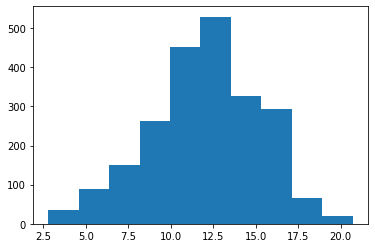

In [31]:
plt.hist(dataset.school)

In [32]:
# Padronizando os dados

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

atributos = ['school'] 

# Escala
scaler = StandardScaler()
scaler.fit(dataset[atributos])
scaled_features = scaler.transform(dataset[atributos])

# Criando um dataframe com dados em escala
scaled_features_df = pd.DataFrame(scaled_features, columns = atributos, index = dataset.index)
scaled_features_df.head()

,school
0,-0.596552
1,-0.627375
2,-0.658198
3,-0.689021
4,-0.781490


(array([ 34.,  88., 151., 262., 452., 529., 327., 292.,  66.,  21.]),
 array([-2.84662452, -2.29489448, -1.74316443, -1.19143438, -0.63970434,
        -0.08797429,  0.46375575,  1.0154858 ,  1.56721584,  2.11894589,
         2.67067593]),
 <a list of 10 Patch objects>)

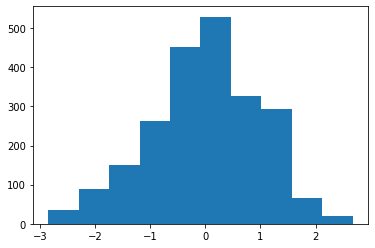

In [33]:
plt.hist(scaled_features_df.school)

In [34]:
# Segunda versão do modelo
modelo_v2 = sm.OLS(endog = dataset['life_expectancy'], exog = sm.add_constant(scaled_features_df.values)).fit()
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     3634.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        00:45:12   Log-Likelihood:                -7155.3
No. Observations:                2222   AIC:                         1.431e+04
Df Residuals:                    2220   BIC:                         1.433e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.8544      0.129    535.573      0.000      68.602      69.107
x1             7.7502      0.129     60.284      0.000       7.498       8.002
==============================================================================
Omnibus:                      249.699   Durbin-Watson:                   0.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              360.095
Skew:                          -0.843   Prob(JB):                     6.40e-79
Kurtosis:                       4.022   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multicolinearidade

Abordamos a regressão linear simples usando uma variável. No entanto, nos casos do mundo real, lidaremos com diversas variáveis. Isso é chamado de regressão multivariada. 

Colinearidade é o estado em que duas variáveis são altamente correlacionadas e contêm informações semelhantes sobre a variação em um determinado conjunto de dados. Para detectar colinearidade entre variáveis, basta criar uma matriz de correlação e encontrar variáveis com grandes valores absolutos. 

A multicolinearidade, por outro lado, é mais problemática de detectar porque surge quando três ou mais variáveis, altamente correlacionadas, são incluídas em um modelo. Para tornar as coisas piores, a multicolinearidade pode surgir mesmo quando pares isolados de variáveis não são colineares.

- Condition Number - Essa estatística mede a sensibilidade da saída de uma função em comparação à sua entrada. Quando temos multicolinearidade, podemos esperar flutuações muito maiores para pequenas alterações nos dados; portanto, esperamos ver um número relativamente pequeno, algo abaixo de 30. 

Uma alternativa para resolver o problema é normalizar as variáveis independentes para ter comprimento de unidade. Remover uma das variáveis multicolineares também é uma opção. Também podemos experimentar transformações como escala e padronização.

In [35]:
# Calculando a correlação entre as variáveis
cc = dataset[["life_expectancy", 
              "bmi", 
              "hiv", 
              "gdp", 
              "thinness_till19", 
              "inf_death", 
              "school", 
              "lifestyle", 
              "pop_size"]].corr()
print(cc)

                 life_expectancy       bmi       hiv       gdp  \
life_expectancy         1.000000  0.591826 -0.570218  0.464855   
bmi                     0.591826  1.000000 -0.244071  0.307833   
hiv                    -0.570218 -0.244071  1.000000 -0.131684   
gdp                     0.464855  0.307833 -0.131684  1.000000   
thinness_till19        -0.494762 -0.561643  0.212936 -0.311480   
inf_death              -0.188937 -0.232869  0.017758 -0.107413   
school                  0.787895  0.604893 -0.239688  0.494044   
lifestyle               0.524638  0.670402 -0.155901  0.466371   
pop_size               -0.072341 -0.045490 -0.008305  0.038196   

                 thinness_till19  inf_death    school  lifestyle  pop_size  
life_expectancy        -0.494762  -0.188937  0.787895   0.524638 -0.072341  
bmi                    -0.561643  -0.232869  0.604893   0.670402 -0.045490  
hiv                     0.212936   0.017758 -0.239688  -0.155901 -0.008305  
gdp                    -0.31148

In [36]:
cc.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,life_expectancy,bmi,hiv,gdp,thinness_till19,inf_death,school,lifestyle,pop_size
life_expectancy,1.00,0.59,-0.57,0.46,-0.49,-0.19,0.79,0.52,-0.07
bmi,0.59,1.00,-0.24,0.31,-0.56,-0.23,0.60,0.67,-0.05
hiv,-0.57,-0.24,1.00,-0.13,0.21,0.02,-0.24,-0.16,-0.01
gdp,0.46,0.31,-0.13,1.00,-0.31,-0.11,0.49,0.47,0.04
thinness_till19,-0.49,-0.56,0.21,-0.31,1.00,0.45,-0.52,-0.47,0.07
inf_death,-0.19,-0.23,0.02,-0.11,0.45,1.00,-0.23,-0.16,0.16
school,0.79,0.60,-0.24,0.49,-0.52,-0.23,1.00,0.65,-0.06
lifestyle,0.52,0.67,-0.16,0.47,-0.47,-0.16,0.65,1.00,0.02
pop_size,-0.07,-0.05,-0.01,0.04,0.07,0.16,-0.06,0.02,1.00


In [37]:
# Terceira versão do modelo de regressão (agora regressão linear múltipla)
formula = 'life_expectancy ~ bmi + hiv + gdp + thinness_till19 + school + lifestyle'
modelo_v3 = ols(formula, data = dataset).fit()
modelo_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1418.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        00:45:12   Log-Likelihood:                -6480.5
No. Observations:                2222   AIC:                         1.297e+04
Df Residuals:                    2215   BIC:                         1.301e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          46.5274      0.544     85.581      0.000      45.461      47.593
bmi                 0.0698      0.007      9.681      0.000       0.056       0.084
hiv                -0.6632      0.017    -38.246      0.000      -0.697      -0.629
gdp              7.492e-05   8.28e-06      9.049      0.000    5.87e-05    9.12e-05
thinness_till19    -0.0668      0.026     -2.543      0.011      -0.118      -0.015
school              1.7929      0.043     41.386      0.000       1.708       1.878
lifestyle          -0.0032      0.001     -5.090      0.000      -0.004      -0.002
==============================================================================
Omnibus:                       90.115   Durbin-Watson:                   0.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.232
Skew:                          -0.307   Prob(JB):                     8.00e-37
Kurtosis:                       4.191   Cond. No.                     8.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# Padronizando os dados

from sklearn.preprocessing import StandardScaler

atributos = ['bmi', 'hiv', 'gdp', 'thinness_till19', 'school', 'lifestyle'] 

# Escala
scaler = StandardScaler()
scaler.fit(dataset[atributos])
scaled_features = scaler.transform(dataset[atributos])

# Criando um dataframe com dados em escala
scaled_features_df = pd.DataFrame(scaled_features, columns = atributos, index = dataset.index)
scaled_features_df.head()

,bmi,hiv,gdp,thinness_till19,school,lifestyle
0,-0.925718,-0.346871,-0.450787,2.708739,-0.596552,-0.906158
1,-0.950903,-0.346871,-0.448702,2.774420,-0.627375,-0.906180
2,-0.976088,-0.346871,-0.447305,2.818208,-0.658198,-0.906202
3,-1.001273,-0.346871,-0.444503,2.861995,-0.689021,-0.906224
4,-1.021421,-0.346871,-0.488966,2.927676,-0.781490,-0.906241


In [39]:
# Quarta versão do modelo
modelo_v4 = sm.OLS(endog = dataset['life_expectancy'], exog = sm.add_constant(scaled_features_df.values)).fit()
modelo_v4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1418.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        00:45:12   Log-Likelihood:                -6480.5
No. Observations:                2222   AIC:                         1.297e+04
Df Residuals:                    2215   BIC:                         1.301e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.8544      0.095    724.822      0.000      68.668      69.041
x1             1.3864      0.143      9.681      0.000       1.106       1.667
x2            -3.7919      0.099    -38.246      0.000      -3.986      -3.598
x3             1.0219      0.113      9.049      0.000       0.800       1.243
x4            -0.3049      0.120     -2.543      0.011      -0.540      -0.070
x5             5.8169      0.141     41.386      0.000       5.541       6.093
x6            -0.7380      0.145     -5.090      0.000      -1.022      -0.454
==============================================================================
Omnibus:                       90.115   Durbin-Watson:                   0.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.232
Skew:                          -0.307   Prob(JB):                     8.00e-37
Kurtosis:                       4.191   Cond. No.                         3.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Variance Inflation Factor - VIF

O fator de inflação de variância (Variance Inflation Factor - VIF) é uma medida de colinearidade entre variáveis preditoras em uma regressão múltipla. É calculado considerando a razão da variância de todos os betas de um determinado modelo, dividida pela variância de um único beta, se este fosse adequado.

Etapas para implementar o VIF

- Execute uma regressão múltipla.
- Calcule os fatores VIF.
- Inspecione os fatores para cada variável preditora, se o VIF estiver entre 5 e 10, provavelmente haverá multicolinearidade e você deve considerar a possibilidade de descartar a variável.

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [41]:
# Atributos
atrib = ['bmi', 'hiv', 'gdp', 'thinness_till19', 'school', 'lifestyle'] 
atributos = "+".join(atrib)

In [42]:
atributos

'bmi+hiv+gdp+thinness_till19+school+lifestyle'

In [43]:
# Obtém X e y no formato de matrizes a partir da regressão
y, X = dmatrices('life_expectancy ~' + atributos, dataset, return_type = 'dataframe')

In [44]:
X

,Intercept,bmi,hiv,gdp,thinness_till19,school,lifestyle
0,1.0,19.1,0.1,584.259210,17.2,10.1,0.191
1,1.0,18.6,0.1,612.696514,17.5,10.0,0.186
2,1.0,18.1,0.1,631.744976,17.7,9.9,0.181
3,1.0,17.6,0.1,669.959000,17.9,9.8,0.176
4,1.0,17.2,0.1,63.537231,18.2,9.5,0.172
...,...,...,...,...,...,...,...
2217,1.0,27.1,33.6,454.366654,9.4,9.2,118.156
2218,1.0,26.7,36.7,453.351155,9.8,9.5,108.402
2219,1.0,26.3,39.8,57.348340,1.2,10.0,116.509
2220,1.0,25.9,42.1,548.587312,1.6,9.8,44.548


In [45]:
# Para cada valor de X calcula o VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Atributos"] = X.columns

In [46]:
vif

,VIF Factor,Atributos
0,32.753952,Intercept
1,2.272781,bmi
2,1.089279,hiv
3,1.413162,gdp
4,1.593343,thinness_till19
5,2.189162,school
6,2.329312,lifestyle


In [47]:
# Padronizando os dados

from sklearn.preprocessing import StandardScaler

atributos = ['bmi', 'hiv', 'gdp', 'thinness_till19', 'school'] 

# Escala
scaler = StandardScaler()
scaler.fit(dataset[atributos])
scaled_features = scaler.transform(dataset[atributos])

# Criando um dataframe com dados em escala
scaled_features_df = pd.DataFrame(scaled_features, columns = atributos, index = dataset.index)
scaled_features_df.head()

,bmi,hiv,gdp,thinness_till19,school
0,-0.925718,-0.346871,-0.450787,2.708739,-0.596552
1,-0.950903,-0.346871,-0.448702,2.774420,-0.627375
2,-0.976088,-0.346871,-0.447305,2.818208,-0.658198
3,-1.001273,-0.346871,-0.444503,2.861995,-0.689021
4,-1.021421,-0.346871,-0.488966,2.927676,-0.781490


In [48]:
# Quinta versão do modelo
modelo_v5 = sm.OLS(endog = dataset['life_expectancy'], exog = sm.add_constant(scaled_features_df.values)).fit()
modelo_v5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1677.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        00:45:12   Log-Likelihood:                -6493.4
No. Observations:                2222   AIC:                         1.300e+04
Df Residuals:                    2216   BIC:                         1.303e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.8544      0.096    720.782      0.000      68.667      69.042
x1             1.0673      0.129      8.242      0.000       0.813       1.321
x2            -3.8291      0.099    -38.510      0.000      -4.024      -3.634
x3             0.8832      0.110      8.014      0.000       0.667       1.099
x4            -0.2788      0.120     -2.314      0.021      -0.515      -0.043
x5             5.6064      0.135     41.503      0.000       5.341       5.871
==============================================================================
Omnibus:                       97.385   Durbin-Watson:                   0.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.575
Skew:                          -0.336   Prob(JB):                     4.54e-39
Kurtosis:                       4.206   Cond. No.                         2.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([  1.,   2.,  10.,  33., 199., 580., 846., 458.,  82.,  11.]),
 array([-26.75929837, -22.50241158, -18.2455248 , -13.98863801,
         -9.73175122,  -5.47486443,  -1.21797764,   3.03890915,
          7.29579594,  11.55268272,  15.80956951]),
 <a list of 10 Patch objects>)

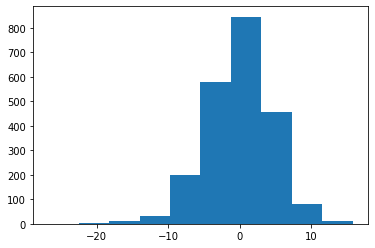

In [49]:
# Plot dos Resíduos
plt.hist(modelo_v5.resid)

# Fim